# 🎉 Congratulations! The Launch of pnuopt on GitHub 🎉

Our hard work and dedication have finally paid off. We are proud to announce the first official release of the pnuopt package on GitHub! This is a significant milestone for us and a testament to the collaborative effort and commitment of everyone involved.

In [ ]:
!pip install git+https://github.com/kaper-edward/pnuopt.git

  Cloning https://github.com/kaper-edward/pnuopt.git to /tmp/pip-req-build-1nxinyms
  Running command git clone --filter=blob:none --quiet https://github.com/kaper-edward/pnuopt.git /tmp/pip-req-build-1nxinyms
  Resolved https://github.com/kaper-edward/pnuopt.git to commit 313ea856e83dcaf2672d06f7e71faf0cbfb73927
  Preparing metadata (setup.py) ... done
  Created wheel for pnuopt: filename=pnuopt-0.1.0-py3-none-any.whl size=5213 sha256=000215de1ccb42d38611085dfdb3ab4359e2e4b175f481ef7d7969f5eb59584d
  Stored in directory: /tmp/pip-ephem-wheel-cache-h44r3vjh/wheels/b9/d7/9b/eab840a671903aa87e28c6d967cc07cda3cc54930961b3ae01
Successfully built pnuopt


# Genetic Algorithm Class

In [1]:
import numpy as np

class GeneticAlgorithm:
  def __init__(
    self, fitness_function, initial_population_generator,
        selection_function, crossover_function, mutation_function,
        population_size=100, num_generations=1000,
        crossover_probability=0.99,
        mutation_probability=None
    ):
    self.fitness_function = fitness_function
    self.initial_population_generator = initial_population_generator

    self.selection = selection_function
    self.crossover = crossover_function
    self.mutation = mutation_function

    self.population_size = population_size
    self.num_generations = num_generations

    self.crossover_probability = crossover_probability
    self.mutation_probability = mutation_probability if mutation_probability is not None else 1 / self.population_size

    self.population = None
    self.best_solution = None
    self.best_score = float('inf')

  def fit(self):
    self.population = self.initial_population_generator(population_size=self.population_size)
    # print(self.population)
    for generation in range(self.num_generations):
      fitness_scores = [self.fitness_function(solution=individual) for individual in self.population]
      # print(fitness_scores)
      best_idx = np.argmin(fitness_scores)

      if fitness_scores[best_idx] < self.best_score:
        self.best_score = fitness_scores[best_idx]
        self.best_solution = self.population[best_idx]
        
        if generation == self.num_generations - 1: break

      new_population = []
      for _ in range(self.population_size):
        # Selection
        parents_indices = self.selection(fitness_scores, 2)
        parent1, parent2 = self.population[parents_indices[0]], self.population[parents_indices[1]]
        # Crossover
        if np.random.rand() < self.crossover_probability:
          child = self.crossover(parent1, parent2)
        else:
          child = parent1.copy()
        # Mutation
        mutated_child = self.mutation(child, self.mutation_probability)
        new_population.append(mutated_child)
      self.population = new_population

    return self.best_solution

  def predict(self):
      return self.best_solution

  def score(self):
      return self.best_score

# 1
 Make a solution for the TSP using a genetic algorithm (GA). The provided GeneticAlgorithm class serves as a framework, but you need to implement specific components suitable for solving the TSP.

 ```
cities = [
    (8, 31), (54, 97), (50, 50), (65, 16), (70, 47), (25, 100), (55, 74), (77, 87),
    (6, 46), (70, 78), (13, 38), (100, 32), (26, 35), (55, 16), (26, 77), (17, 67),
    (40, 36), (38, 27), (33, 2), (48, 9), (62, 20), (17, 92), (30, 2), (80, 75),
    (32, 36), (43, 79), (57, 49), (18, 24), (96, 76), (81, 39)
]
 ```

In [8]:
from functools import partial
from collections import Counter

cities = [
    (8, 31), (54, 97), (50, 50), (65, 16), (70, 47), (25, 100), (55, 74), (77, 87),
    (6, 46), (70, 78), (13, 38), (100, 32), (26, 35), (55, 16), (26, 77), (17, 67),
    (40, 36), (38, 27), (33, 2), (48, 9), (62, 20), (17, 92), (30, 2), (80, 75),
    (32, 36), (43, 79), (57, 49), (18, 24), (96, 76), (81, 39)
]

def fitness_func(solution, cities):
    total_distance = 0
    for i in range(len(solution)):
        start_city = cities[solution[i]]
        end_city = cities[solution[(i + 1) % len(solution)]]
        total_distance += np.sqrt((start_city[0] - end_city[0])**2 + (start_city[1] - end_city[1])**2)
    return total_distance

def initial_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        solution = list(range(num_cities))
        np.random.shuffle(solution)
        population.append(solution[:])
    return population

initial_population_generator = partial(initial_population, num_cities=len(cities))
fitness_func = partial(fitness_func, cities=cities)

def select(fitness_scores, num_parents, tournament_size=3):
  # parents_indices = [int(np.random.uniform(0, len(fitness_scores))) for _ in range(num_parents)] # random selection
  parents_indices = []
  parents_indices.append(np.argmin(fitness_scores))
  parents_indices.append(int(np.random.uniform(0, len(fitness_scores))))
  # print(fitness_scores)
  # print("/parents_indices", parents_indices)
  return parents_indices

def crossover(parent1, parent2):
  # print("parent1", parent1)
  # print("parent2", parent2)
  # print(type(parent1))
  rand_index = int(np.random.uniform(0, len(parent1)))
  # child = parent1
  substitute = [city for city in parent2 if city not in parent1[:rand_index]]
  child = parent1[:rand_index] + substitute
  # child = parent1[:rand_index] + parent2[rand_index]
  # print("rand_index", rand_index)
  # print("child  ", child)
  dup_check = set(child)
  if len(dup_check) == len(child):
    #  print("no dup")
    pass
  else:
     print("dup")
     exit(0)
  return child

def mutate(individual, mutation_rate):
  # print("child", individual)
  # print("mutation prob", mutation_rate)
  if mutation_rate > np.random.uniform(0, 1):
     i, j = [int(np.random.uniform(0, len(individual))) for _ in range(2)]
     individual[i], individual[j] = individual[j], individual[i]
  return individual

ga = GeneticAlgorithm(
    fitness_function=fitness_func,
    initial_population_generator=initial_population_generator,
    selection_function=select,
    crossover_function=crossover,
    mutation_function=mutate,
    population_size=500,
    num_generations=100,
)

def dup(x):
  return list(filter(lambda items: items[1] > 1, Counter(x).items()))
best_solution = ga.fit()
print("check_duplication: ", dup(best_solution))
print("best_solution: ", best_solution)
print("best_score: ", fitness_func(best_solution))

check_duplication:  []
best_solution:  [28, 23, 4, 29, 11, 13, 26, 6, 2, 20, 3, 16, 17, 27, 15, 5, 14, 24, 10, 0, 12, 19, 8, 21, 25, 1, 7, 9, 22, 18]
best_score:  906.4145026566392


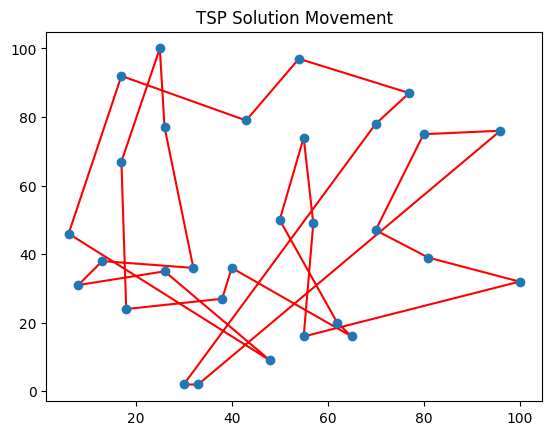

In [9]:
import matplotlib.pyplot as plt

def visualize(solution, cities):
  fig, ax = plt.subplots()
  cities_x, cities_y = zip(*cities)
  solution = best_solution
  tour_x = [cities[city][0] for city in solution + [solution[0]]]
  tour_y = [cities[city][1] for city in solution + [solution[0]]]
  ax.plot(tour_x, tour_y, 'r-')
  ax.plot(cities_x, cities_y, 'o')
  ax.set_title("TSP Solution Movement")
  plt.show()

visualize(best_solution, cities)